<a href="https://colab.research.google.com/github/estrella-mooney/ma-learning-python/blob/main/build_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [99]:
df = pd.read_csv('water_potability_clean_dropna.csv')

In [100]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [101]:
# print the total size
print(len(df))
#print the test size
print(len(test))
#prtint the train size
print(len(train))

2011
403
1608


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2011 non-null   int64  
 1   ph               2011 non-null   float64
 2   Hardness         2011 non-null   float64
 3   Solids           2011 non-null   float64
 4   Chloramines      2011 non-null   float64
 5   Sulfate          2011 non-null   float64
 6   Conductivity     2011 non-null   float64
 7   Organic_carbon   2011 non-null   float64
 8   Trihalomethanes  2011 non-null   float64
 9   Turbidity        2011 non-null   float64
 10  Potability       2011 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 172.9 KB


In [103]:
features = ['ph', 'Sulfate', 'Organic_carbon', 'Chloramines', 'Solids', 'Conductivity', 'Turbidity' ]
label = ['Potability']

X_train = train[features]
y_train = train[label]


X_test = test[features]
y_test = test[label]


In [104]:
# alternative way of writing the code boave
# iloc allows us to select columns by their id's
#X_train = train.iloc[:,1:-1]
#y_train = train['Potability']


#X_test = test.iloc[:,1:-1]
#y_test = test['Potability']


In [105]:
# build the model

In [106]:
from sklearn.linear_model import LogisticRegression
# create a variable called logreg
logreg = LogisticRegression(random_state=42)
# we will then fit the model (line of best fit with out train)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[231,   0],
       [172,   0]])

In [108]:
from sklearn.metrics import accuracy_score
#calculate accuracy score
accuracy_score(y_test, y_pred)

0.5732009925558312

Text(0.5, 427.9555555555555, 'Predicted label')

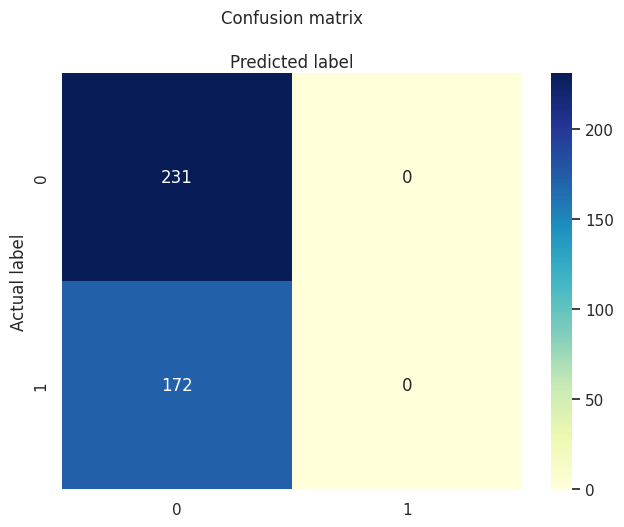

In [109]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')